In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

full_data = pd.read_csv('full_data.csv')

# add column that represents if the row is a missing value or not
full_data['NAN_TRUE'] = np.where(full_data['DC_POWER'].isna(),1,0)

full_data.head()

,DATE_TIME,NEW_PLANT_ID,NEW_SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,NAN_TRUE
0,2020-05-15 00:00:00,1,0,25.184316,22.857507,0.0,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00,0
1,2020-05-15 00:00:00,1,1,25.184316,22.857507,0.0,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00,0
2,2020-05-15 00:00:00,1,2,25.184316,22.857507,0.0,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00,0
3,2020-05-15 00:00:00,1,3,25.184316,22.857507,0.0,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00,0
4,2020-05-15 00:00:00,1,4,25.184316,22.857507,0.0,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00,0


In [44]:
p1 = full_data[full_data['NEW_PLANT_ID'] == 1]
p2 = full_data[full_data['NEW_PLANT_ID'] == 2]

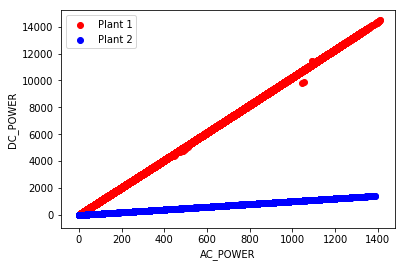

In [17]:
fig, ax = plt.subplots()
ax.scatter(p1['AC_POWER'], p1['DC_POWER'], color='red', label='Plant 1')
ax.scatter(p2['AC_POWER'], p2['DC_POWER'], color='blue', label='Plant 2')

ax.set_xlabel('AC_POWER')
ax.set_ylabel('DC_POWER')

leg = ax.legend();

In [66]:
import plotly.express as px
nan_date = pd.DataFrame(full_data.groupby(['DATE_TIME', 'NEW_PLANT_ID']).sum()).reset_index()
nan_date['NAN_TRUE'] = nan_date['NAN_TRUE']/(22)

fig = px.line(nan_date, x="DATE_TIME", y="NAN_TRUE", color='NEW_PLANT_ID')

fig.show()


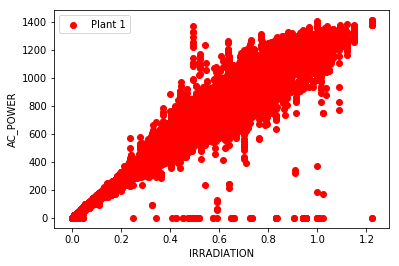

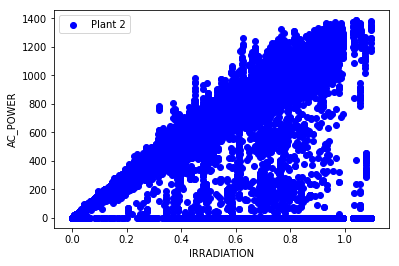

In [72]:
fig, ax = plt.subplots()
ax.scatter(p1['IRRADIATION'], p1['AC_POWER'], color='red', label='Plant 1')

ax.set_xlabel('IRRADIATION')
ax.set_ylabel('AC_POWER')
leg = ax.legend();
plt.show()

fig, ax = plt.subplots()
ax.scatter(p2['IRRADIATION'], p2['AC_POWER'], color='blue', label='Plant 2')

ax.set_xlabel('IRRADIATION')
ax.set_ylabel('AC_POWER')
leg = ax.legend();
plt.show()



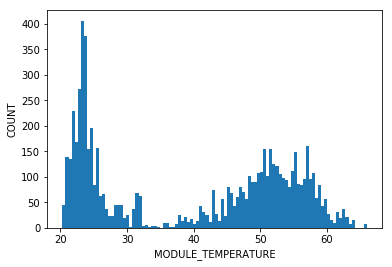

In [82]:
p2_problems = p2[(p2['IRRADIATION'] > 0) & (p2['AC_POWER'] == 0)]

fig, ax = plt.subplots()
ax.hist(p2_problems['MODULE_TEMPERATURE'], bins=100)


ax.set_xlabel('MODULE_TEMPERATURE')
ax.set_ylabel('COUNT')
plt.show()



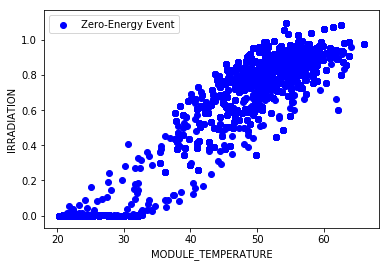

In [85]:
fig, ax = plt.subplots()
ax.scatter(p2_problems['MODULE_TEMPERATURE'], p2_problems['IRRADIATION'], color='blue', label='Zero-Energy Event')

ax.set_xlabel('MODULE_TEMPERATURE')
ax.set_ylabel('IRRADIATION')
leg = ax.legend();
plt.show()


In [86]:
p1['DATE'].unique()

array(['2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
       '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
       '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',
       '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30',
       '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
       '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07',
       '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
       '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
       '2020-06-16', '2020-06-17'], dtype=object)

Coefficients 1: 
 [[1255.442402]]
Mean squared error: 5800.08
Coefficient of determination: 0.96


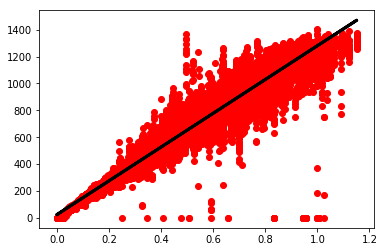

Coefficients 2: 
 [[813.83332961]]
Mean squared error: 134774.76
Coefficient of determination: 0.21


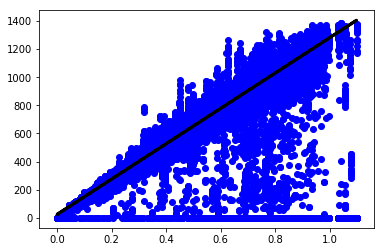

In [108]:
# Predictions
p1_pred = p1[(p1['DATE'] <= '2020-06-10') & (p1['IRRADIATION'] > 0)].dropna()
p2_pred = p2[(p2['DATE'] <= '2020-06-10') & (p2['IRRADIATION'] > 0)].dropna()

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X1 = np.array(p1_pred['IRRADIATION']).reshape(-1, 1)
y1 = np.array(p1_pred['AC_POWER']).reshape(-1, 1)

regr1 = linear_model.LinearRegression()
regr1.fit(X1, y1)

y1_pred = regr1.predict(X1)

print('Coefficients 1: \n', regr1.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y1, y1_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y1, y1_pred))

plt.scatter(X1, y1,  color='red')
plt.plot(X1, y1_pred, color='black', linewidth=3)

ax.set_xlabel('IRRADIATION')
ax.set_ylabel('AC_POWER')

plt.show()

X2 = np.array(p2_pred['IRRADIATION']).reshape(-1, 1)
y2 = np.array(p2_pred['AC_POWER']).reshape(-1, 1)

regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)

y2_pred = regr1.predict(X2)

print('Coefficients 2: \n', regr2.coef_)

print('Mean squared error: %.2f'
      % mean_squared_error(y2, y2_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y2, y2_pred))

plt.scatter(X2, y2,  color='blue')
plt.plot(X2, y2_pred, color='black', linewidth=3)

ax.set_xlabel('IRRADIATION')
ax.set_ylabel('AC_POWER')

plt.show()

In [105]:
p1_lastweek_true = p1[p1['DATE'] > '2020-06-10'].dropna()

X1_lastweek = np.array(p1_lastweek_true['IRRADIATION']).reshape(-1, 1) 
y1_lastweek_true = np.array(p1_lastweek_true['AC_POWER']).reshape(-1, 1)
y1_lastweek_pred = regr1.predict(X1_lastweek)

print('True:', y1_lastweek_true.sum())
print('Predict:', y1_lastweek_pred.sum())

True: 4027380.58484676
Predict: 4042680.3589363815


In [109]:
p2_lastweek_true = p2[p2['DATE'] > '2020-06-10'].dropna()

X2_lastweek = np.array(p2_lastweek_true['IRRADIATION']).reshape(-1, 1) 
y2_lastweek_true = np.array(p2_lastweek_true['AC_POWER']).reshape(-1, 1)
y2_lastweek_pred = regr1.predict(X2_lastweek)

print('True:', y2_lastweek_true.sum())
print('Predict:', y2_lastweek_pred.sum())

True: 2924922.9773992673
Predict: 3480916.671719121
